# Interpolation und Regression

In [1]:
# die Pakete Numpy und Matplotlib werden geladen:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe2:

Die 3 Stützpunkte (1; -2); (2; 3); (3; 1) sollen mittels linearer Regression approximiert dargestellt werden. Wie ändert sich das
Ergebnis der linearen Regression, wenn man auch noch den Stützpunkt (4; 4) dazu nimmt?

In [2]:
def estimate_regression_parameters(x,y):
    mu_x = x.mean() # Mittelwert x
    mu_y = y.mean() # Mittelwert y
    beta = np.sum((x- mu_x)*(y - mu_y))/(np.sum((x-mu_x)**2)) # Steigung
    alpha = mu_y - mu_x * beta # Schnittpunkt mit Y-Achse
    return beta, alpha

def plot_regression(x,y,beta,alpha):
    # zuerst werden die Stützpunkte als Scatterplot dargestellt:
    plt.scatter(x,y)

    # dann wird ein Wertebereich für die Regressionsgerade erstellt:
    x_reg = np.arange(x.min(), x.max()+1) # Wertebereich

    # die Funktionswerte werden nun für den Wertebereich bestimmt:
    y_reg = beta * x_reg + alpha # f(x) der linearen Regression

    # die Regressionsgerade wrd als Linie und die Parameter in der Legende  daregestellt
    plt.plot(x_reg,y_reg,color = "red", 
            label = f"{beta.round(3)} * x + {alpha.round(3)}")
    plt.legend()

Die Parameter der Regression sind:
alpha -2.3333333333333335
beta 1.5


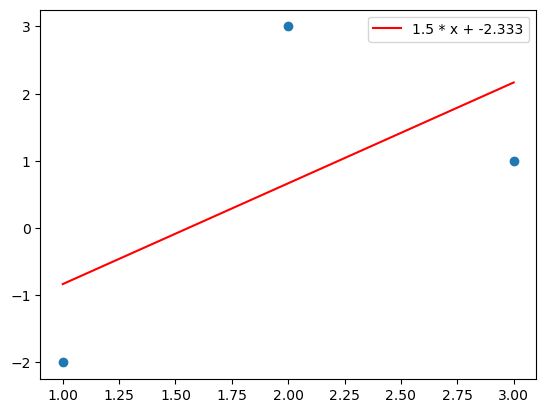

In [3]:

x_values = np.array([1,2,3])
y_values = np.array([-2,3,1])
beta_value, alpha_value = estimate_regression_parameters(x_values,y_values)
print("Die Parameter der Regression sind:")
print("alpha", str(alpha_value))
print("beta", str(beta_value))
plot_regression(x_values,y_values,beta_value,alpha_value)

für den zusätzlichen Punkt (4,4) werden die Parameter nun neu gerechnet und die Regressionsgerade dargestellt:

In [4]:


x_values_2 = np.array([1,2,3,4])
y_values_2 = np.array([-2,3,1,4])
beta_value_2, alpha_value_2 = estimate_regression_parameters(x_values_2,y_values_2)
print("Die Parameter der Regression sind:")
print("alpha", str(alpha_value_2))
print("beta", str(beta_value_2))
plot_regression(x_values_2,y_values_2,beta_value_2,alpha_value_2)

Die Parameter der Regression sind:
alpha -2.5
beta 1.6


Die Unterschiede kann man visualisieren, wenn beide Regressionsgeraden in einem Plot dargestellt werden: 

In [5]:

plot_regression(x_values,y_values,beta_value,alpha_value)
plot_regression(x_values_2,y_values_2,beta_value_2,alpha_value_2)

## Aufgabe 3:

Interpolieren Sie die Funktion
$y =\sqrt{x}$
für die Werte x = 1,03 und x = 1,16 an Hand der Tabelle durch eine stückweise lineare
Interpolation, in dem Sie jeweils die Werte zwischen 2 Punkten mit einer linearen Funktion
interpolieren. Vergleichen Sie das Ergebnis mit den exakten Werten.
|  |  | | | | |
| - | - | - | - | - | - |
x |1,00 |1,05 |1,10 |1,15 |1,20 |
y |1,00000 |1,02470 |1,04881 |1,07238 |1,09544|


In [6]:

def lin_interpolation(x,x1,y1,x2,y2):
    '''
    Diese Funktion berechnet den y-Wert ein
    '''
    m = (y2-y1)/(x2 - x1) # Steigung der Geraden
    y = m * (x -x1) + y1 # Lineare Funktion
    return y


def function(x):
    # hier wird die Funktion definiert:
    y= np.sqrt(x)
    return y

def plot_function(fun,x):
    # diese Funktion plottet die Funktion über einen Wertebereich innerhalb der x-Werte
    x_reg = np.arange(x.min(), x.max()+0.01,00.1) # Wertebereich mit kleinen Abständen
    # die Funktionswerte werden nun für den Wertebereich bestimmt:
    y_reg = fun(x_reg) # f(x)

    plt.plot(x_reg,y_reg,color = "red",label="Funktion")

In [7]:
x_values = np.array([1, 1.05, 1.10, 1.15, 1.2])
# berechne exakte Y-Werte anhand der Funktion (map wendet die Funktion auf den Array an)
y_values = list(map(function,x_values))
print(y_values)

[1.0, 1.02469507659596, 1.0488088481701516, 1.0723805294763609, 1.0954451150103321]


In [8]:
# Interpolation für x1
x1 = 1.03
y1_interpoliert = lin_interpolation(x1,x_values[0],y_values[0],x_values[1],y_values[1])
print("y1 interpoliert: ",y1_interpoliert)
y1_exakt = function(x1)
print("y1 exakt: ",y1_exakt)

# Interpolation für x2
x2 = 1.16
y2_interpoliert = lin_interpolation(x2,x_values[1],y_values[1],x_values[2],y_values[2])
print("y2 interpoliert: ",y2_interpoliert)
y2_exakt = function(x2)
print("y2 exakt: ",y2_exakt)

y1 interpoliert:  1.014817045957576
y1 exakt:  1.014889156509222
y2 interpoliert:  1.0777453740591816
y2 exakt:  1.0770329614269007


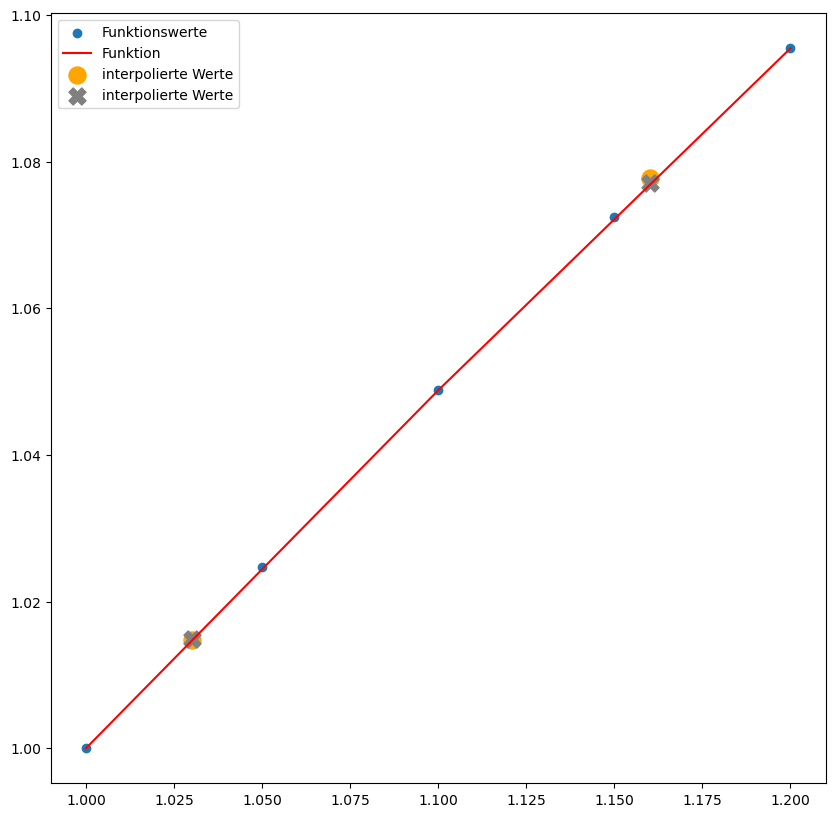

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values, label="Funktionswerte")
plot_function(function,x_values)
plt.scatter([x1,x2],[y1_interpoliert,y2_interpoliert],color="orange",marker="o",s=150,label="interpolierte Werte")
plt.scatter([x1,x2],[y1_exakt,y2_exakt],color="grey",marker="X",s=150,label="interpolierte Werte")
plt.legend()